#### 1. What are the main motivations for reducing a dataset’s dimensionality? What are the main drawbacks?

By reducing a dataset dimensionality it immediatly makes it lighter (uses less memory). Furthermore it might speed up learning algorithms significantly. Efficiency aside, dimensionality reduction is also very useful in data visualization, making it possible to reduce high dimentional datasets to only 2 or 3-D. It might also increase model performance by eliminating less useful features (the edges of MNIST digits for example). Major drawbacks include loss of information and increased complexity of pipelines (by adding extra steps), which might increase the probability of bugs and make debugging more difficult.

<ins>Book answer</ins>:
The main motivations for dimensionality reduction are:

• To speed up a subsequent training algorithm (in some cases it may even remove noise and redundant features, making the training algorithm perform better)

• To visualize the data and gain insights on the most important features

• To save space (compression)

The main drawbacks are:

• Some information is lost, possibly degrading the performance of subsequent training algorithms.

• It can be computationally intensive.

• It adds some complexity to your Machine Learning pipelines.

• Transformed features are often hard to interpret.


#### 2. What is the curse of dimensionality?

Data with a great number of dimensions, although containing more information, tends to be very sparse. This means that new instances probably lie far away from training instances, which increases the likelihood of overfitting.


<ins>Book answer</ins>: The curse of dimensionality refers to the fact that many problems that do not exist in low-dimensional space arise in high-dimensional space. In Machine Learning, one common manifestation is the fact that randomly sampled high dimensional vectors are generally very sparse, increasing the risk of overfitting and making it very difficult to identify patterns in the data without having plenty of training data.

#### 3. Once a dataset’s dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?

It is possible to reverse it, but at the cost of losing information. In other words the reversed data will be different.

<ins>Book answer</ins>: Once a dataset’s dimensionality has been reduced using one of the algorithms we discussed, it is almost always impossible to perfectly reverse the operation, because some information gets lost during dimensionality reduction. Moreover, while some algorithms (such as PCA) have a simple reverse transformation
procedure that can reconstruct a dataset relatively similar to the original, other algorithms (such as T-SNE) do not.

#### 4. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

It can be used in almost any type of data set, but if vanilla PCA is effective or not then depends on the data itself. In some instances k-PCA might be more suitable or even manifiold learning methods (LLE) might be more desirable.

<ins>Book answer</ins>: PCA can be used to significantly reduce the dimensionality of most datasets, even if they are highly nonlinear, because it can at least get rid of useless dimensions. However, if there are no useless dimensions—as in a Swiss roll dataset—then reducing dimensionality with PCA will lose too much information. You want to unroll the Swiss roll, not squash it.

#### 5. Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?

This is highly dependent on the data itself. Setting the ""explained variance ratio to 95%" means that the data is reduced to a number of dimensions which are responsible for 95% of the total variiance. This can mean anywhere from 1 dimension to d-1 dimensions.

<ins>Book answer</ins>: That’s a trick question: it depends on the dataset. Let’s look at two extreme examples. First, suppose the dataset is composed of points that are almost perfectly aligned. In this case, PCA can reduce the dataset down to just one dimension while still preserving 95% of the variance. Now imagine that the dataset is composed of perfectly random points, scattered all around the 1,000 dimensions. In this case roughly 950 dimensions are required to preserve 95% of the variance. So the answer is, it depends on the dataset, and it could be any number between 1 and 950. Plotting the explained variance as a function of the number of dimensions is one way to get a rough idea of the dataset’s intrinsic dimensionality.

#### 6. In what cases would you use vanilla PCA, Incremental PCA, Randomized PCA, or Kernel PCA?

While the SVD approach have computational complexity of $O(m x n²) + O(n³)$, randomized PCA has a complexity of $O(m x d²) + O(d³)$ for finding the aproximation of $d$ first components. This makes Randomized PCA much faster when d is much smaller than n. Since IPCA allows data to be split in mini-batches, it is useful for very large datasets and online applications. 

<ins>Book answer</ins>: Regular PCA is the default, but it works only if the dataset fits in memory. Incremental PCA is useful for large datasets that don’t fit in memory, but it is slower than regular PCA, so if the dataset fits in memory you should prefer regular PCA. Incremental PCA is also useful for online tasks, when you need to apply PCA on the fly, every time a new instance arrives. Randomized PCA is useful when you want to considerably reduce dimensionality and the dataset fits in memory; in this case, it is much faster than regular PCA. Finally, Kernel PCA is useful for nonlinear datasets.

#### 7. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

While dimensionality reduction is an unsupervised technique, it is often used before a supervised one. By incorparating it on the pipeline, and performing a grid-search using the supervised model's performance measure, it is possible to find the optimal dimensionality reduction parameters for the task at hand.

<ins>Book answer</ins>: Intuitively, a dimensionality reduction algorithm performs well if it eliminates a lot of dimensions from the dataset without losing too much information. One way to measure this is to apply the reverse transformation and measure the reconstruction error. However, not all dimensionality reduction algorithms provide a reverse transformation. Alternatively, if you are using dimensionality reduction as a preprocessing step before another Machine Learning algorithm (e.g., a Random Forest classifier), then you can simply measure the performance
of that second algorithm; if dimensionality reduction did not lose too much information, then the algorithm should perform just as well as when using the original dataset.

#### 8. Does it make any sense to chain two different dimensionality reduction algorithms?

<ins>Book answer</ins>: It can absolutely make sense to chain two different dimensionality reduction algorithms. A common example is using PCA to quickly get rid of a large number of useless dimensions, then applying another much slower dimensionality reduction algorithm, such as LLE. This two-step approach will likely yield the same performance as using LLE only, but in a fraction of the time.

#### 9. Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier?

#### 10. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

## Exercise 9

In [1]:
#Standard libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Sklearn
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [3]:
X, y = mnist['data'], mnist['target']
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [5]:
forest = RandomForestClassifier(verbose=3, random_state=42)

forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   38.0s finished


RandomForestClassifier(random_state=42, verbose=3)

In [7]:
from timeit import default_timer as timer

In [8]:
forest = RandomForestClassifier(verbose=3, random_state=42)

In [10]:
start = timer()
forest.fit(X_train, y_train)
end = timer()

print(end - start)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   39.1s finished


In [12]:
print(f'###Elapsed time ={end-start}###')

###Elapsed time =39.311803419999706###


In [13]:
y_pred = forest.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [14]:
accuracy_score(y_test, y_pred)

0.9705

In [19]:
pca = PCA(n_components=0.95)
start = timer()
X_reduced = pca.fit_transform(X)
end = timer()

In [20]:
print(f'###Elapsed time ={end-start}###')

###Elapsed time =13.752453596000123###


In [21]:
X_red_train = X_reduced[:60000]
X_red_test = X_reduced[60000:]

In [22]:
start = timer()
forest.fit(X_red_train, y_train)
end = timer()

print(f'###Elapsed time ={end-start}###')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished


In [23]:
y_pred = forest.predict(X_red_test)
accuracy_score(y_test, y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


0.9498

## Exercise 10

In [8]:
from sklearn.manifold import TSNE

In [9]:
tsne = TSNE(verbose=3)

In [10]:
start = timer()
X_tsne = tsne.fit_transform(X)
end = timer()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.052s...
[t-SNE] Computed neighbors for 70000 samples in 317.539s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for s

In [11]:
print(f'### Elapsed time = {end-start} ###')

### Elapsed time = 758.1431581529998 ###


In [12]:
X_tsne

array([[ 27.342192  ,   9.710201  ],
       [ 20.97816   , -17.770496  ],
       [ 12.436374  , -41.889412  ],
       ...,
       [  1.1018758 , -14.311368  ],
       [ 11.910777  ,   0.97929585],
       [ 49.07964   ,   2.6474607 ]], dtype=float32)

In [13]:
len(X_tsne)

70000

In [14]:
### Converts y from an array of string to int

inty = [int(i) for i in y]

In [15]:
inty

[5,
 0,
 4,
 1,
 9,
 2,
 1,
 3,
 1,
 4,
 3,
 5,
 3,
 6,
 1,
 7,
 2,
 8,
 6,
 9,
 4,
 0,
 9,
 1,
 1,
 2,
 4,
 3,
 2,
 7,
 3,
 8,
 6,
 9,
 0,
 5,
 6,
 0,
 7,
 6,
 1,
 8,
 7,
 9,
 3,
 9,
 8,
 5,
 9,
 3,
 3,
 0,
 7,
 4,
 9,
 8,
 0,
 9,
 4,
 1,
 4,
 4,
 6,
 0,
 4,
 5,
 6,
 1,
 0,
 0,
 1,
 7,
 1,
 6,
 3,
 0,
 2,
 1,
 1,
 7,
 9,
 0,
 2,
 6,
 7,
 8,
 3,
 9,
 0,
 4,
 6,
 7,
 4,
 6,
 8,
 0,
 7,
 8,
 3,
 1,
 5,
 7,
 1,
 7,
 1,
 1,
 6,
 3,
 0,
 2,
 9,
 3,
 1,
 1,
 0,
 4,
 9,
 2,
 0,
 0,
 2,
 0,
 2,
 7,
 1,
 8,
 6,
 4,
 1,
 6,
 3,
 4,
 5,
 9,
 1,
 3,
 3,
 8,
 5,
 4,
 7,
 7,
 4,
 2,
 8,
 5,
 8,
 6,
 7,
 3,
 4,
 6,
 1,
 9,
 9,
 6,
 0,
 3,
 7,
 2,
 8,
 2,
 9,
 4,
 4,
 6,
 4,
 9,
 7,
 0,
 9,
 2,
 9,
 5,
 1,
 5,
 9,
 1,
 2,
 3,
 2,
 3,
 5,
 9,
 1,
 7,
 6,
 2,
 8,
 2,
 2,
 5,
 0,
 7,
 4,
 9,
 7,
 8,
 3,
 2,
 1,
 1,
 8,
 3,
 6,
 1,
 0,
 3,
 1,
 0,
 0,
 1,
 7,
 2,
 7,
 3,
 0,
 4,
 6,
 5,
 2,
 6,
 4,
 7,
 1,
 8,
 9,
 9,
 3,
 0,
 7,
 1,
 0,
 2,
 0,
 3,
 5,
 4,
 6,
 5,
 8,
 6,
 3,
 7,
 5,
 8,
 0,
 9,
 1,
 0,


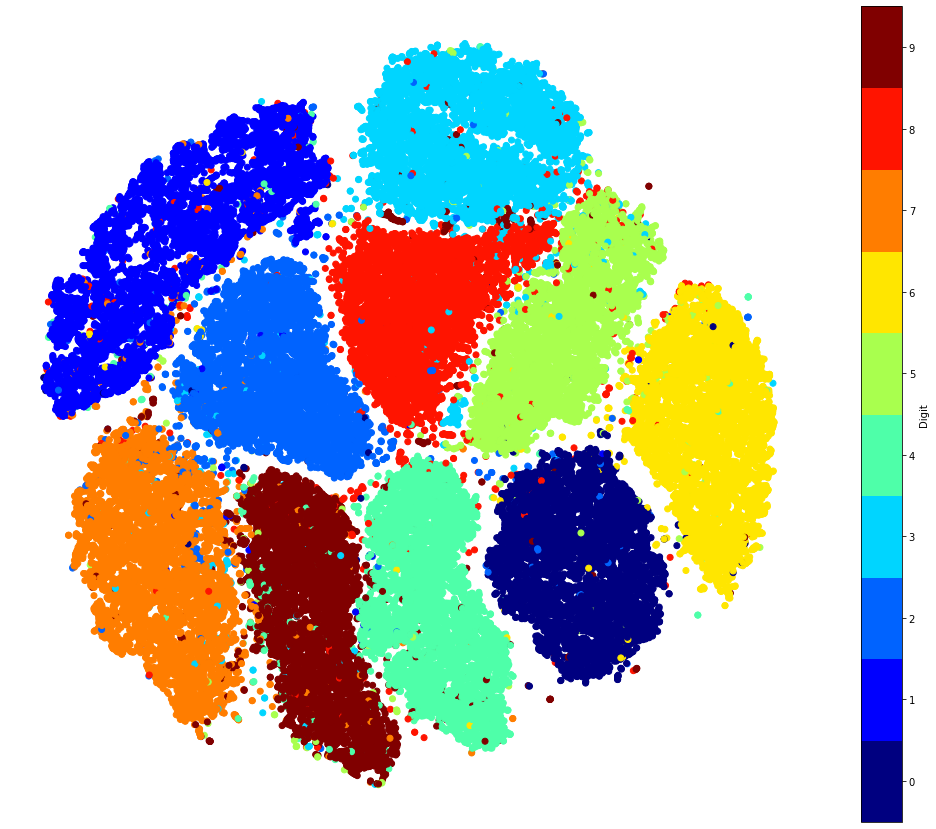

In [43]:
plt.figure(figsize=(18,15))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=inty, cmap=plt.cm.get_cmap('jet', 10))

plt.axis('off')
plt.colorbar(ticks=range(10), label='Digit')
plt.clim(-0.5, 9.5);

In [24]:
%matplotlib inline
import matplotlib as mpl

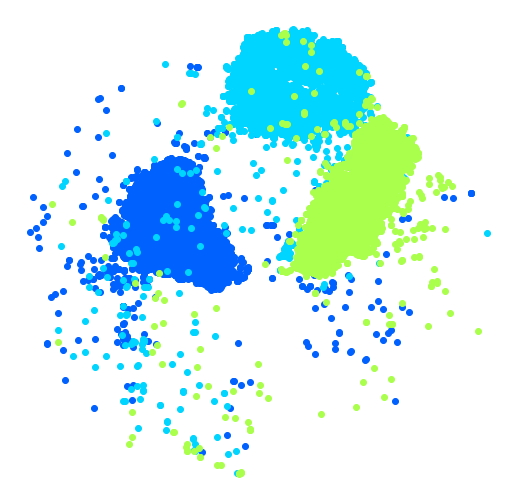

In [32]:
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_tsne[np.array(inty) == digit, 0], X_tsne[np.array(inty) == digit, 1], c=[cmap(digit / 9)])
plt.axis('off');
#plt.show()


In [33]:
idx = (y == '2') | (y == '3') | (y == '5') 
X_subset = X[idx]
y_subset = y[idx]

In [34]:
tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

In [39]:
inty_subset = [int(i) for i in y_subset]

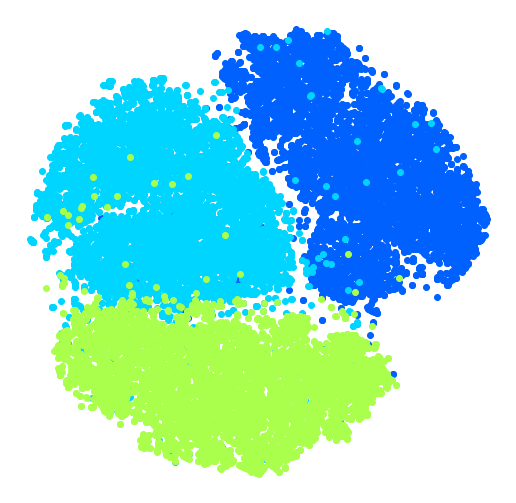

In [42]:
plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[np.array(inty_subset) == digit, 0], X_subset_reduced[np.array(inty_subset) == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show();

In [36]:
y_subset

array(['5', '2', '3', ..., '2', '3', '5'], dtype=object)

In [41]:
inty_subset

[5,
 2,
 3,
 3,
 5,
 3,
 2,
 2,
 3,
 2,
 3,
 5,
 3,
 5,
 3,
 3,
 5,
 3,
 2,
 2,
 3,
 3,
 5,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 5,
 3,
 3,
 5,
 2,
 5,
 3,
 3,
 2,
 2,
 2,
 5,
 5,
 2,
 3,
 2,
 3,
 5,
 2,
 2,
 2,
 5,
 3,
 2,
 3,
 3,
 2,
 3,
 5,
 2,
 3,
 2,
 3,
 5,
 5,
 3,
 5,
 3,
 2,
 2,
 3,
 3,
 5,
 2,
 5,
 2,
 5,
 2,
 5,
 3,
 3,
 5,
 5,
 3,
 3,
 5,
 2,
 5,
 2,
 2,
 3,
 2,
 3,
 5,
 3,
 5,
 5,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 5,
 2,
 2,
 2,
 2,
 2,
 3,
 5,
 2,
 5,
 3,
 5,
 2,
 5,
 5,
 3,
 2,
 3,
 5,
 2,
 2,
 3,
 2,
 3,
 5,
 2,
 5,
 2,
 2,
 3,
 5,
 3,
 3,
 2,
 3,
 5,
 3,
 5,
 5,
 3,
 5,
 5,
 5,
 2,
 5,
 5,
 2,
 5,
 3,
 5,
 5,
 3,
 2,
 3,
 2,
 5,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 5,
 3,
 2,
 2,
 2,
 5,
 3,
 5,
 2,
 5,
 5,
 5,
 3,
 5,
 2,
 3,
 3,
 2,
 2,
 5,
 5,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 5,
 2,
 2,
 5,
 2,
 3,
 2,
 5,
 2,
 2,
 3,
 2,
 5,
 5,
 3,
 2,
 5,
 5,
 3,
 5,
 3,
 3,
 5,
 5,
 2,
 5,
 5,
 3,
 5,
 2,
 5,
 2,
 3,
 3,
 2,
 2,
 5,
 2,
 5,
 5,
 5,
 3,
 3,
 2,
 5,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
